In [37]:
from __future__ import print_function, division
import math
import cmath
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
rc = {'axes.facecolor': (1, 1, 1, 0),
 'figure.edgecolor': (1, 1, 1, 0),
 'figure.facecolor': (1, 1, 1, 0),
 'figure.figsize': (4.0, 2.75),
 'figure.subplot.bottom': 0.125,
 'font.size': 10,
 'savefig.dpi': 2*72}
%config InlineBackend.rc = rc
%matplotlib inline
import quaternion
import waveforms
import waveforms.SpEC
import spherical_functions as sf

In [175]:
w_raw = waveforms.SpEC.read_from_h5('/Users/boyle/Research/Code/waveforms/SpEC/samples/rhOverM_Asymptotic_GeometricUnits_CoM.h5/Extrapolated_N2.dir')
w = waveforms.SpEC.read_from_h5('/Users/boyle/Research/Code/waveforms/SpEC/samples/rhOverM_Asymptotic_GeometricUnits_CoM.h5/Extrapolated_N2.dir')
w.data[:, 2] = 0.0
w.data[:, 5:] = 0.0
dt = w.max_norm_time()
w.t -= w.max_norm_time()
w = w[:np.argmin(abs(w.t-200.)), 2:5]

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `waveform.pdf'.


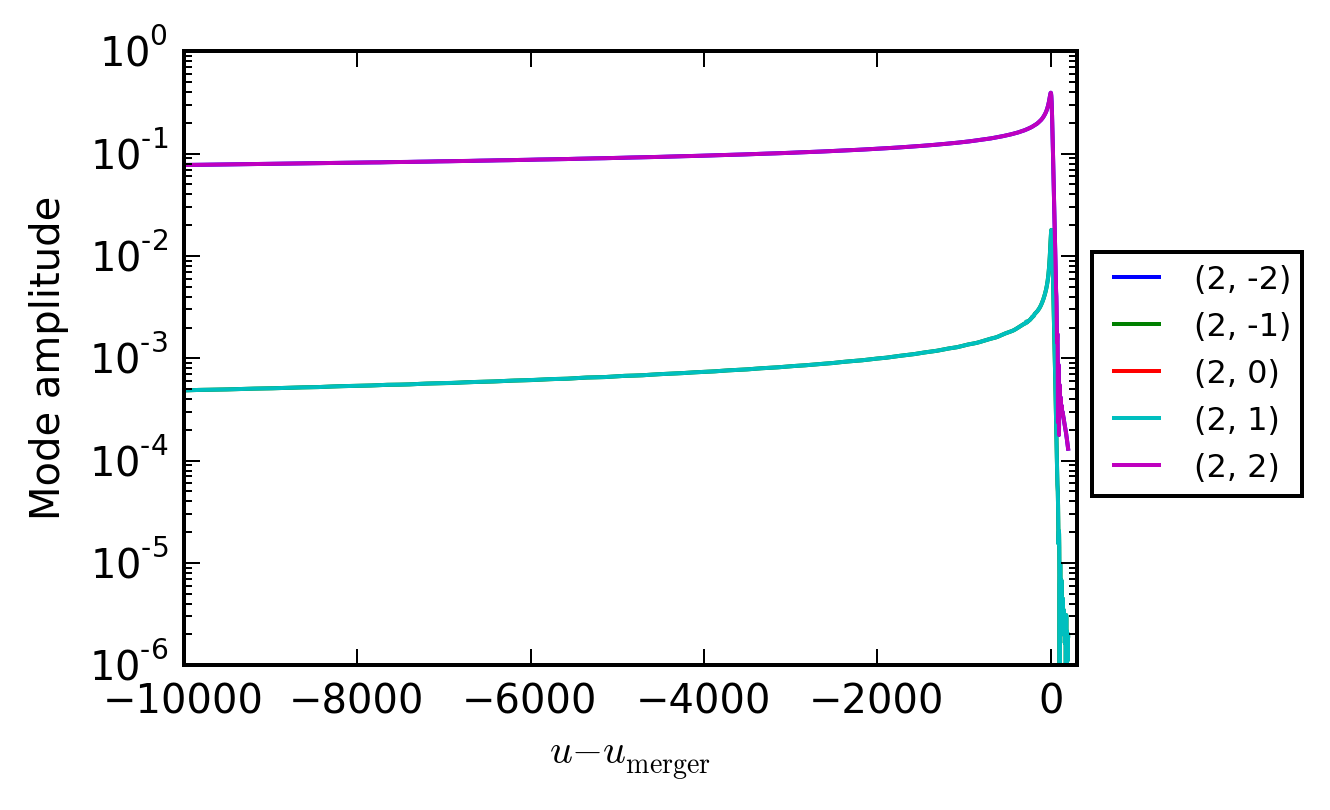

In [100]:
lines = plt.semilogy(w.t, w.abs)
plt.legend(iter(lines), [r'({0}, {1})'.format(ell, m) for ell, m in w_t_t.LM[:5]],
           prop={'size':8}, bbox_to_anchor=(1.27, 0.7))
plt.xlabel(r'$u - u_\mathrm{merger}$')
plt.ylabel(r'Mode amplitude')
plt.xlim(-10000., 300.)
plt.ylim(1e-6, 1)
#plt.tight_layout()
plt.savefig('tmp.pdf', transparent=True, bbox_inches='tight')
! pdfcrop --hires tmp.pdf waveform.pdf

## Time translation

In [101]:
w_t_t = w.copy()
w_t_t = w_t_t.transform(time_translation=1000.)

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `waveform_time_translation.pdf'.


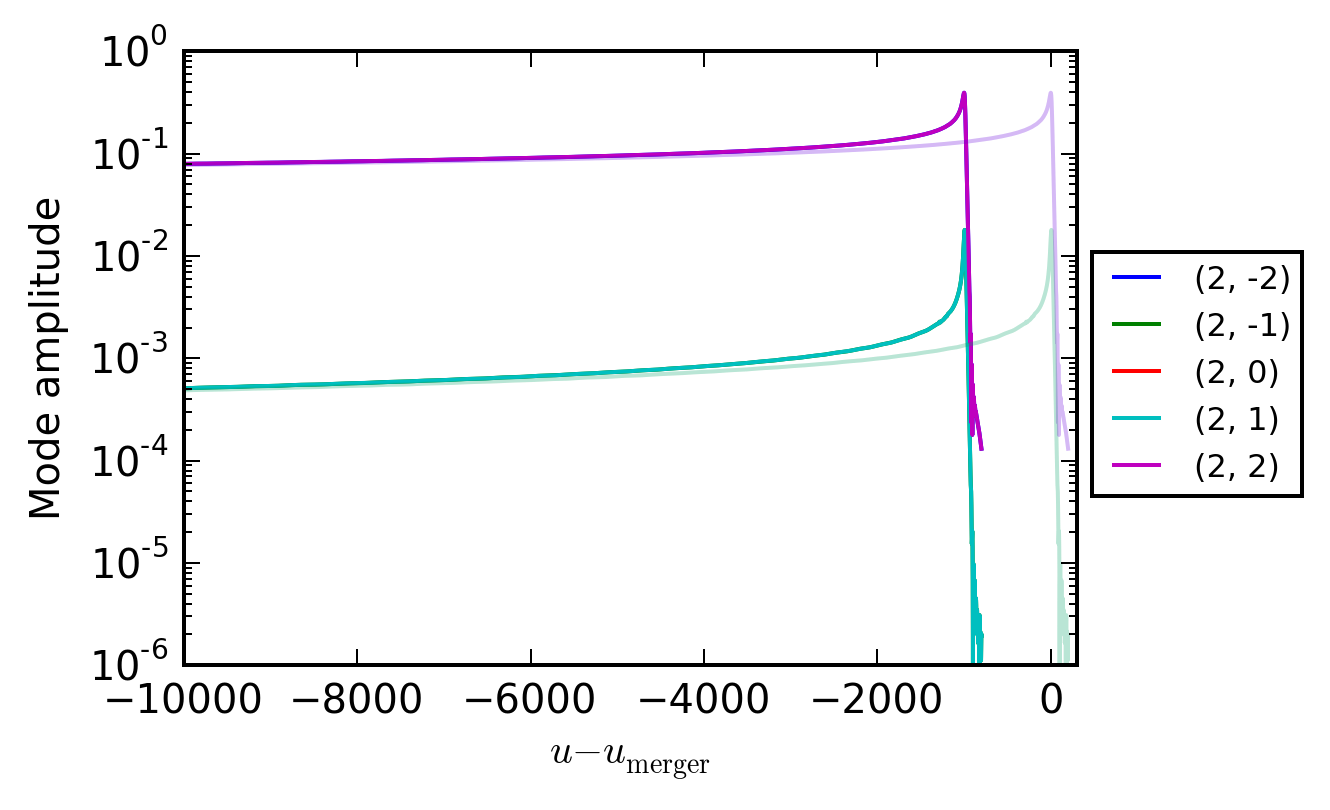

In [104]:
lines = plt.semilogy(w_t_t.t, w_t_t.abs)
for i, line in enumerate(lines):
    plt.semilogy(w.t, w.abs[:,i], alpha=0.15, color=plt.getp(line, 'color'))
plt.legend(iter(lines), [r'({0}, {1})'.format(ell, m) for ell, m in w_t_t.LM if ell<3],
           prop={'size':8}, bbox_to_anchor=(1.27,0.7))
plt.xlabel(r'$u - u_\mathrm{merger}$')
plt.ylabel(r'Mode amplitude')
plt.xlim(-10000., 300.)
plt.ylim(1e-6, 1)
#plt.tight_layout()
plt.savefig('tmp.pdf', transparent=True, bbox_inches='tight')
! pdfcrop --hires tmp.pdf waveform_time_translation.pdf

## Space translation

In [113]:
w_s_t = w.copy()
w_s_t = w_s_t.transform(space_translation=[.1, 0, 0])

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `waveform_space_translation.pdf'.


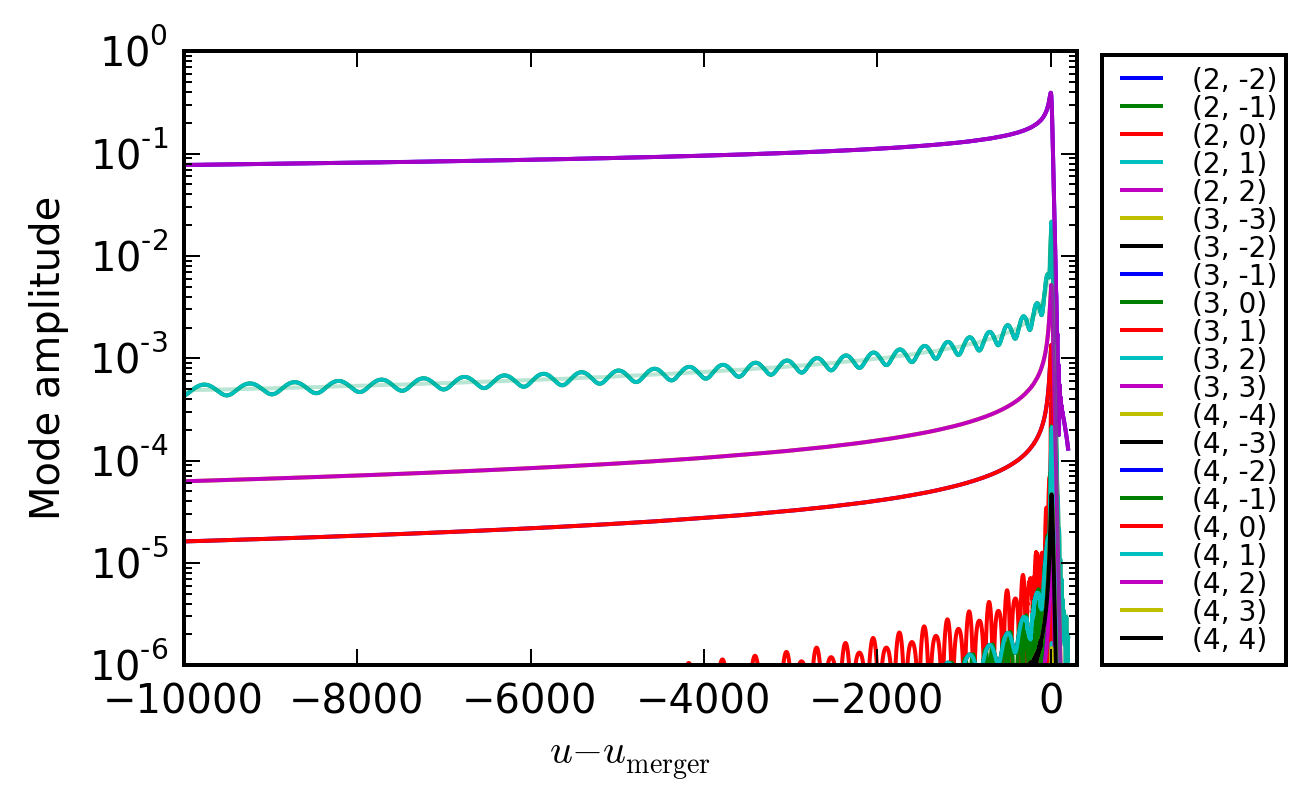

In [118]:
lines = plt.semilogy(w_s_t.t, w_s_t.abs)
for i, line in enumerate(lines):
    plt.semilogy(w.t, w.abs[:,i], alpha=0.15, color=plt.getp(line, 'color'))
plt.legend(iter(lines), [r'({0}, {1})'.format(ell, m) for ell, m in w_t_t.LM],
           prop={'size':7}, bbox_to_anchor=(1.25, 1.017), labelspacing=0)
plt.xlabel(r'$u - u_\mathrm{merger}$')
plt.ylabel(r'Mode amplitude')
plt.xlim(-10000., 300.)
plt.ylim(1e-6, 1)
#plt.tight_layout()
plt.savefig('tmp.pdf', transparent=True, bbox_inches='tight')
! pdfcrop --hires tmp.pdf waveform_space_translation.pdf

## Spacetime translation

In [122]:
w_st_t = w.copy()
w_st_t = w_st_t.transform(spacetime_translation=[1000., 0.1, 0, 0])

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `waveform_spacetime_translation.pdf'.


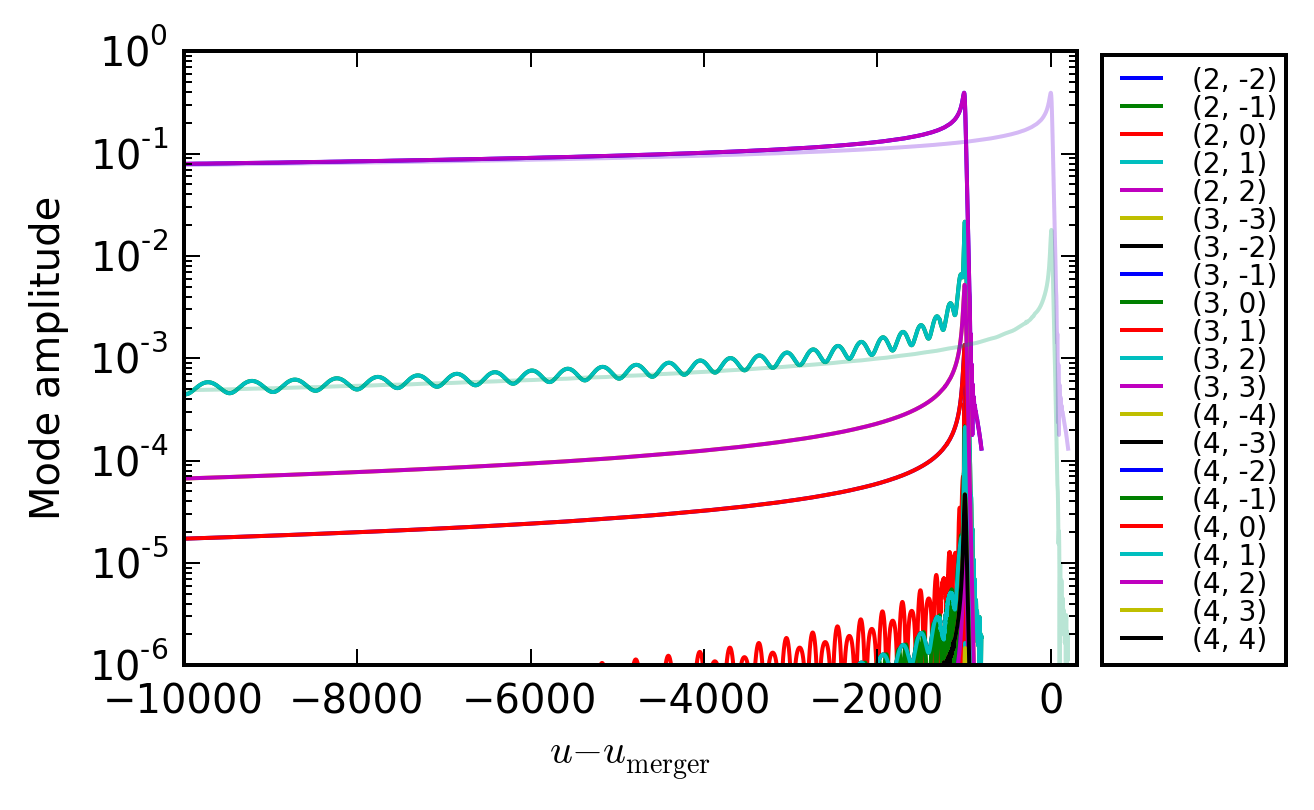

In [125]:
lines = plt.semilogy(w_st_t.t, w_st_t.abs)
for i, line in enumerate(lines):
    plt.semilogy(w.t, w.abs[:,i], alpha=0.15, color=plt.getp(line, 'color'))
plt.legend(iter(lines), [r'({0}, {1})'.format(ell, m) for ell, m in w_t_t.LM],
           prop={'size':7}, bbox_to_anchor=(1.25, 1.017), labelspacing=0)
plt.xlabel(r'$u - u_\mathrm{merger}$')
plt.ylabel(r'Mode amplitude')
plt.xlim(-10000., 300.)
plt.ylim(1e-6, 1)
#plt.tight_layout()
plt.savefig('tmp.pdf', transparent=True, bbox_inches='tight')
! pdfcrop --hires tmp.pdf waveform_spacetime_translation.pdf

## Rotation

In [135]:
w_r = w.copy()
w_r.rotate_decomposition_basis((0.005 * quaternion.x / 2).exp())

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `waveform_rotation.pdf'.


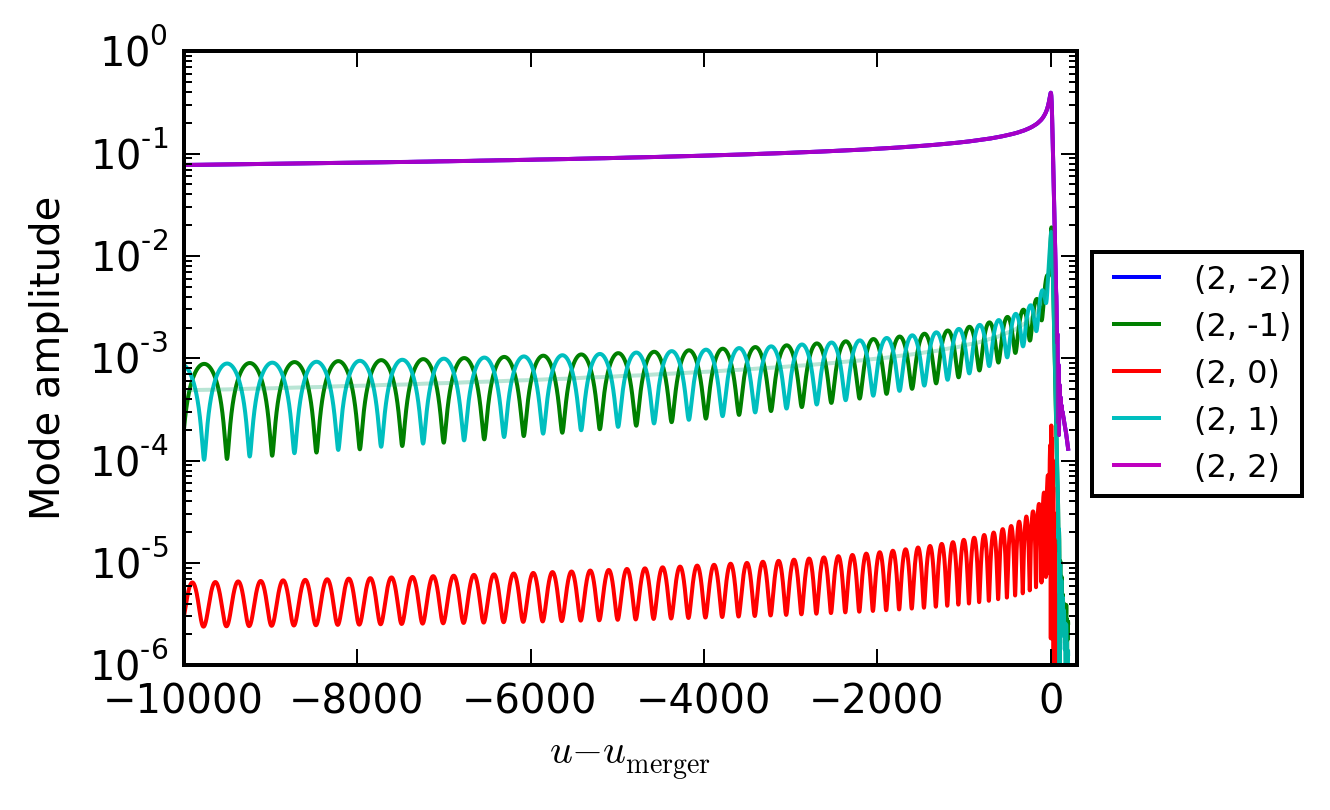

In [136]:
lines = plt.semilogy(w_r.t, w_r.abs[:, :5])
for i, line in enumerate(lines):
    plt.semilogy(w.t, w.abs[:,i], alpha=0.15, color=plt.getp(line, 'color'))
plt.legend(iter(lines), [r'({0}, {1})'.format(ell, m) for ell, m in w_t_t.LM[:5]],
           prop={'size':8}, bbox_to_anchor=(1.27, 0.7))
plt.xlabel(r'$u - u_\mathrm{merger}$')
plt.ylabel(r'Mode amplitude')
plt.xlim(-10000., 300.)
plt.ylim(1e-6, 1)
plt.savefig('tmp.pdf', transparent=True, bbox_inches='tight')
! pdfcrop --hires tmp.pdf waveform_rotation.pdf

## Boost

In [138]:
w_b = w.copy()
w_b.t += dt
w_b = w_b.transform(boost_velocity=[1e-4, 0, 0])
w_b.t -= dt

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `waveform_boost.pdf'.


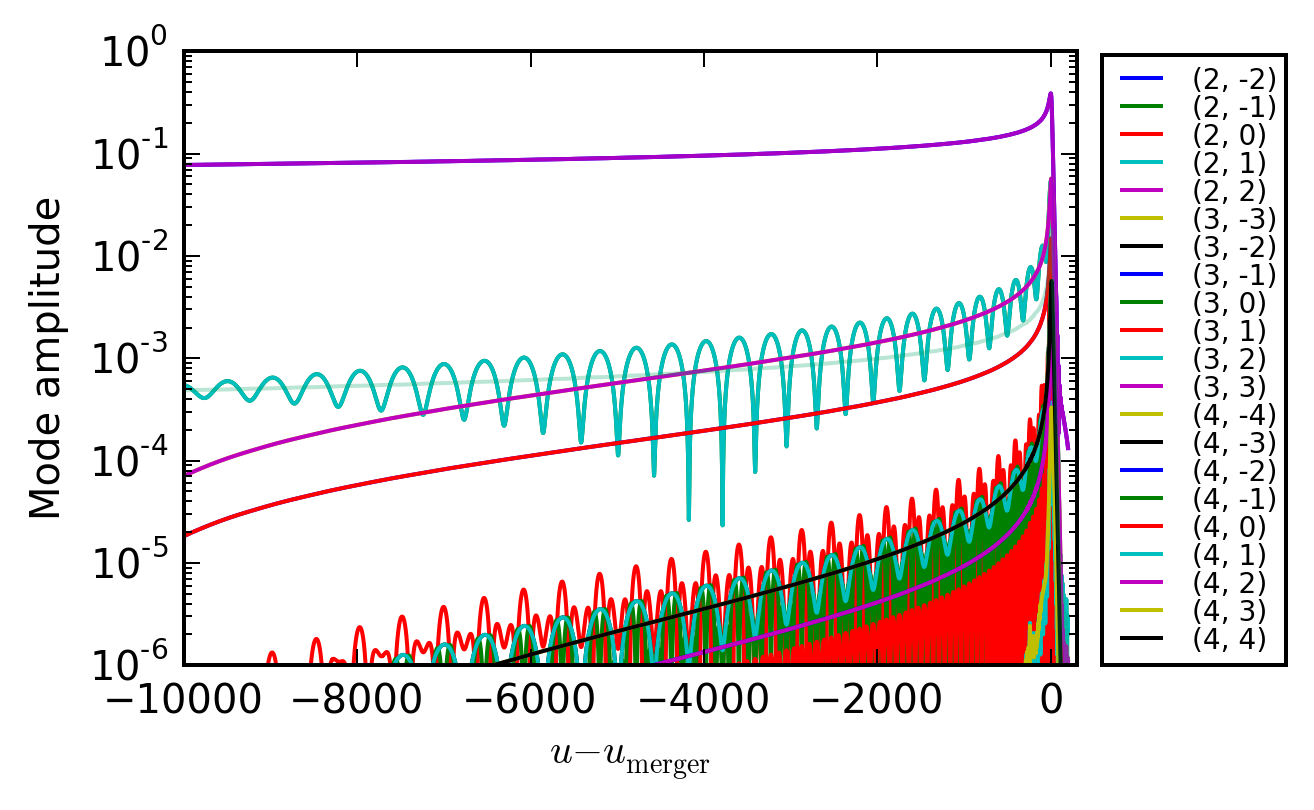

In [139]:
lines = plt.semilogy(w_b.t, w_b.abs)
for i, line in enumerate(lines):
    plt.semilogy(w.t, w.abs[:,i], alpha=0.15, color=plt.getp(line, 'color'))
plt.legend(iter(lines), [r'({0}, {1})'.format(ell, m) for ell, m in w_t_t.LM],
           prop={'size':7}, bbox_to_anchor=(1.25, 1.017), labelspacing=0)
plt.xlabel(r'$u - u_\mathrm{merger}$')
plt.ylabel(r'Mode amplitude')
plt.xlim(-10000., 300.)
plt.ylim(1e-6, 1)
#plt.tight_layout()
plt.savefig('tmp.pdf', transparent=True, bbox_inches='tight')
! pdfcrop --hires tmp.pdf waveform_boost.pdf

## Supertranslation

In [162]:
supertranslation = np.zeros(81, dtype=complex)
np.random.seed(123)

for st_ell, st_m in [[ell,m] for ell in range(5) for m in range(0,ell+1)]:  # [[2,2], [2, 1], [2, 0], [3,3], [3,2], [3,1], [3,0], [4,4], [4, 3], [4, 2], [4, 1], [4, 0]]:
    supertranslation[sf.LM_index(st_ell, st_m, 0)] = 5.0e-3 * np.random.random()
    supertranslation[sf.LM_index(st_ell, -st_m, 0)] = (-1)**st_m * supertranslation[sf.LM_index(st_ell, st_m, 0)]

In [163]:
w_s = w.copy()
w_s = w_s.transform(supertranslation=supertranslation)

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `waveform_supertranslation.pdf'.


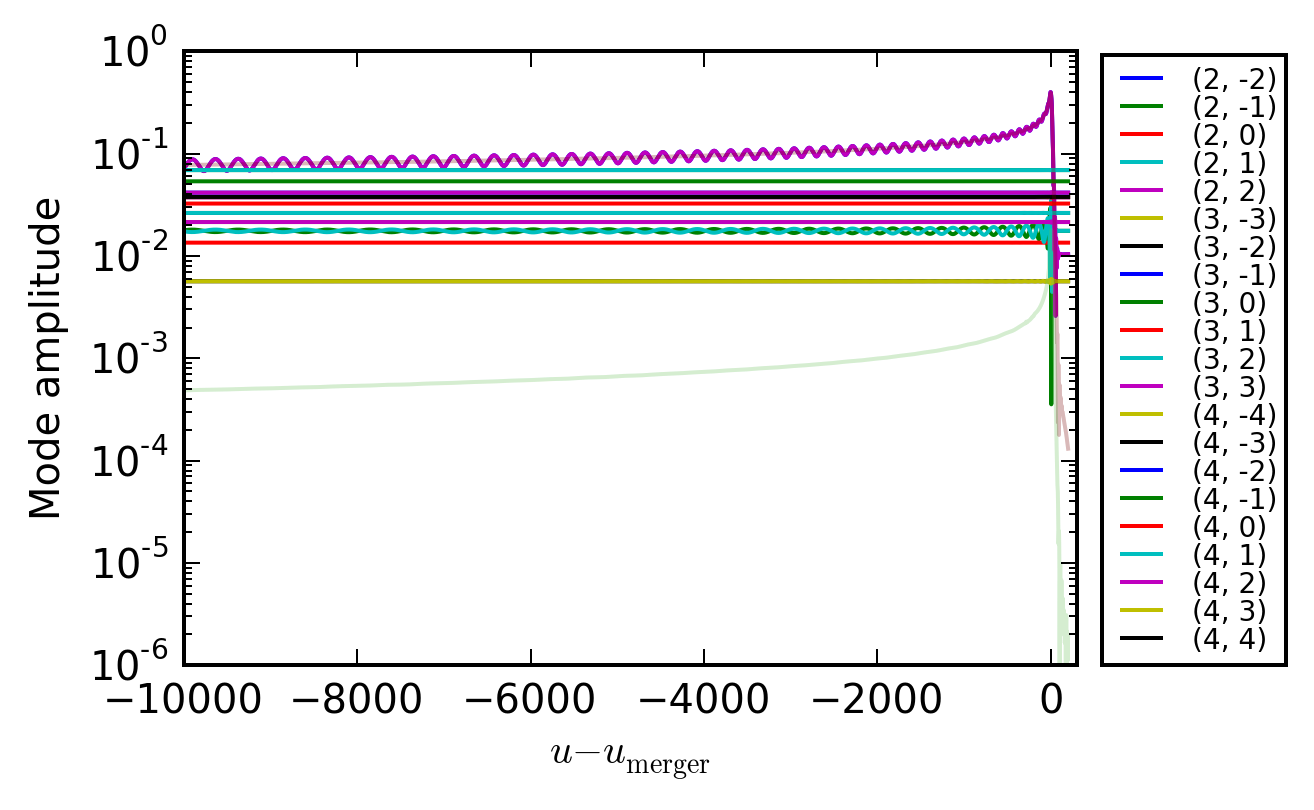

In [164]:
lines = plt.semilogy(w_s.t, w_s.abs)
for i, line in enumerate(lines):
    plt.semilogy(w.t, w.abs[:,w.n_modes-1-i], alpha=0.15, color=plt.getp(line, 'color'))
plt.legend(iter(lines), [r'({0}, {1})'.format(ell, m) for ell, m in w_t_t.LM],
           prop={'size':7}, bbox_to_anchor=(1.25, 1.017), labelspacing=0)
plt.xlabel(r'$u - u_\mathrm{merger}$')
plt.ylabel(r'Mode amplitude')
plt.xlim(-10000., 300.)
plt.ylim(1e-6, 1)
#plt.tight_layout()
plt.savefig('tmp.pdf', transparent=True, bbox_inches='tight')
! pdfcrop --hires tmp.pdf waveform_supertranslation.pdf

## Fixing ringdown

In [176]:
t_0 = 11000.0
i_0 = np.argmin(abs(w_raw.t-t_0))
t_1 = 11300.0
i_1 = np.argmin(abs(w_raw.t-t_1))
t_correction = 11225.0
i_correction = np.argmin(abs(w_raw.t-t_correction))

supertranslation = np.zeros(81, dtype=complex)
st_ell, st_m = 2, -2
supertranslation[sf.LM_index(st_ell, st_m, 0)] = cmath.exp(-0.295j) * 0.755 * w_raw.data[i_correction, sf.LM_index(st_ell, st_m, w.ell_min)]
supertranslation[sf.LM_index(st_ell, -st_m, 0)] = (-1)**st_m * supertranslation[sf.LM_index(st_ell, st_m, 0)].conjugate()
st_ell, st_m = 2, -1
supertranslation[sf.LM_index(st_ell, st_m, 0)] = cmath.exp(6.90j*math.pi/8.) * 2.10 * w_raw.data[i_correction, sf.LM_index(st_ell, st_m, w.ell_min)]
supertranslation[sf.LM_index(st_ell, -st_m, 0)] = (-1)**st_m * supertranslation[sf.LM_index(st_ell, st_m, 0)].conjugate()
st_ell, st_m = 2, 0
supertranslation[sf.LM_index(st_ell, st_m, 0)] = cmath.exp(-0.115*math.pi/8.) * 0.995 * w_raw.data[i_correction, sf.LM_index(st_ell, st_m, w.ell_min)].real
supertranslation = sf.ethbar_inverse_NP(sf.ethbar_inverse_NP(supertranslation, -2, 0), -1, 0)


In [177]:
w_s2 = w.copy()
w_s2 = w_s2.transform(supertranslation=supertranslation)

(1e-06, 1)

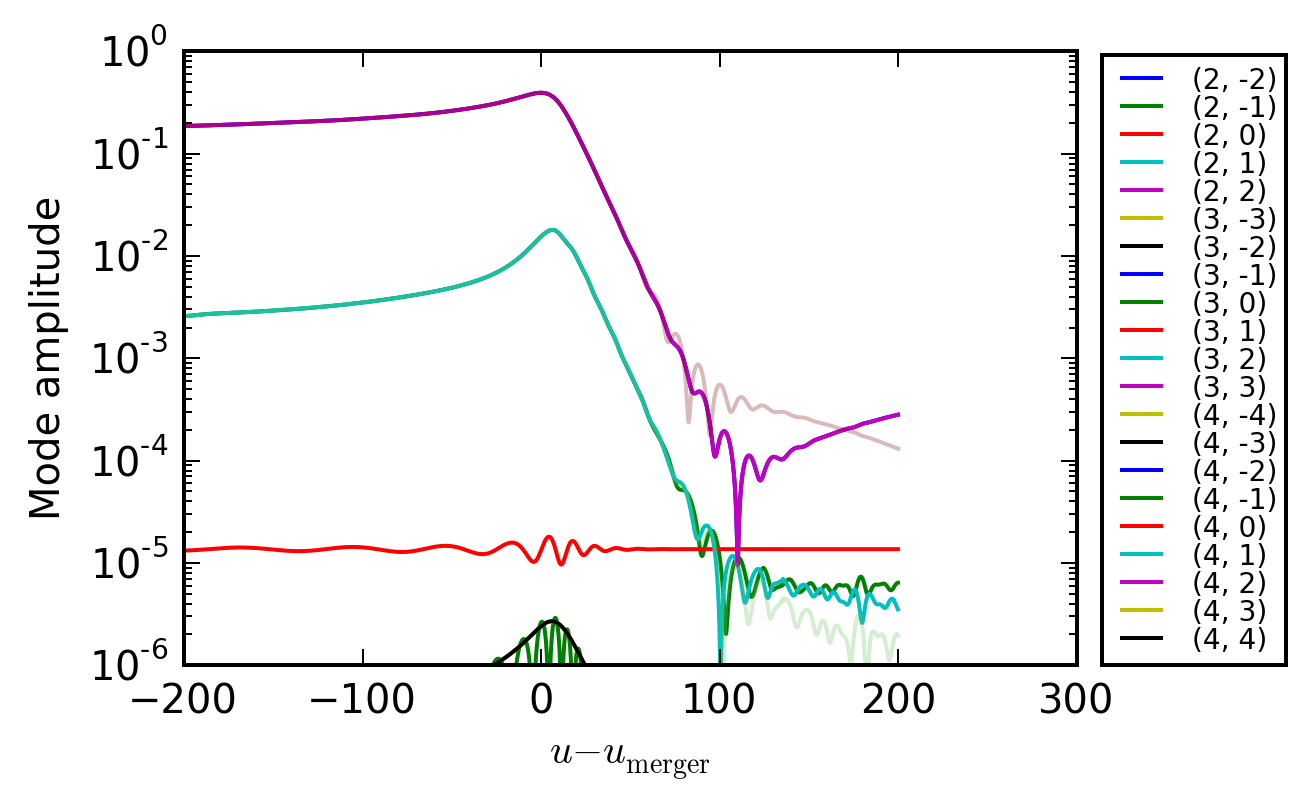

In [178]:
lines = plt.semilogy(w_s2.t, w_s2.abs)
for i, line in enumerate(lines):
    plt.semilogy(w.t, w.abs[:,w.n_modes-1-i], alpha=0.15, color=plt.getp(line, 'color'))
plt.legend(iter(lines), [r'({0}, {1})'.format(ell, m) for ell, m in w_t_t.LM],
           prop={'size':7}, bbox_to_anchor=(1.25, 1.017), labelspacing=0)
plt.xlabel(r'$u - u_\mathrm{merger}$')
plt.ylabel(r'Mode amplitude')
plt.xlim(-200., 300.)
plt.ylim(1e-6, 1)
#plt.savefig('tmp.pdf', transparent=True, bbox_inches='tight')
#! pdfcrop --hires tmp.pdf waveform_supertranslation.pdf